<a href="https://colab.research.google.com/github/lavenya-mohan/Project_4/blob/main/Project_4_Predict_Future_Loss_Claims_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 >  <h1>Business case</h1>



----


Three data sets are provided for the project.

* **Claim Data** (Dataset 1) – all claims that were found from a Loss History Report (LHR) at driver level (Only households with claims will appear in this dataset)

* **Predictor Dataset** (Dataset 2) – all information we have from this household’s insurance application (Application date of January 1, 2017)

* **Subsequent Loss Experience** (Dataset 3) – one year of subsequent loss-experience of these applicants (All information gathered after application date)

* Metadata – Names and descriptions of the variables contained in each of the datasets listed above.
----

***Objective:***

*Create a model where you are trying to identify if the applicant had a future loss (future_clm_ind) using the information known on or before the application date.*

---

*Use the above datasets to:*
1.	Aggregate Dataset 1 at the hhld_id to create the following claim count variables:
  * Number of At Fault claims in each of the last 5 years from application date
  * Number of Not At Fault claims in each of the last 5 years from application date
2.	Merge the Datasets 2 and 3, and the aggregated form of Dataset 1 using hhld_id
3.	Create a model where you are trying to identify if the applicant had a future loss (future_clm_ind) using the information known on or before the application date.


In [1]:
# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd

In [2]:
import itertools
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter

In [3]:
# Installing Pandas Profiler for automated detailed Exploratory Data Analysis
!pip install pandas-profiling --upgrade

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=911736809bb68be911af8db6fbc4d9dcfce47af8d77c4cdd4f0502f69e94971a
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.

In [4]:
!pip install --upgrade numba>=0.56
# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
cudf-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.


In [5]:
!pip install sweetviz --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 34.1 MB/s eta 0:00:00


In [6]:
import sweetviz as sv


In [7]:
# for modeling purpose
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.


In [8]:
from sklearn import preprocessing

In [10]:
import requests
import lxml.html as lh
from sklearn.cluster import KMeans
print("Libraries imported.")

Libraries imported.


> <h2> Loading Datset </h2>

* **Claim Data** (Dataset 1) – all claims that were found from a Loss History Report (LHR) at driver level (Only households with claims will appear in this dataset)

* **Predictor Dataset** (Dataset 2) – all information we have from this household’s insurance application (Application date of January 1, 2017)

* **Subsequent Loss Experience** (Dataset 3) – one year of subsequent loss-experience of these applicants (All information gathered after application date)

In [11]:
# Claim_Data.csv

import os, types
import pandas as pd

# Claim_Data.csv

import os, types
import pandas as pd



df_data_1 = pd.read_excel('/content/Claim_Data.xlsm', sheet_name='Claim_Data')
df_data_1.shape

(5000, 4)

In [12]:
# Predictor Dataset.csv

df_data_2 = pd.read_excel('/content/Predictor Dataset.xlsm', sheet_name='Predictor_Data')
df_data_2.shape


(20000, 41)

In [13]:
# Subsequent_Loss_Experience.csv


df_data_3 = pd.read_excel('/content/Subsequent_Loss_Experience.xlsm',sheet_name='Subsequent_Loss_Experience')
df_data_3.shape


(20000, 5)

In [14]:
df_data_1

,hhld_id,clm_dates,aft_ind,pd_amt
0,6599,2010-12-09,1,5736.39
1,1454,2010-06-14,1,3257.49
2,13691,2011-01-08,1,8190.45
3,10347,2014-02-09,0,428.48
4,6051,2010-03-31,0,107.57
...,...,...,...,...
4995,5567,2012-06-02,0,897.82
4996,3554,2011-07-16,1,6387.09
4997,12332,2014-01-13,0,534.27
4998,11310,2011-07-11,1,7709.68


In [15]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   hhld_id    5000 non-null   int64         
 1   clm_dates  5000 non-null   datetime64[ns]
 2   aft_ind    5000 non-null   int64         
 3   pd_amt     5000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 156.4 KB


# **Data preperation steps:**
Step 1:

  Aggregate Dataset 1 at the hhld_id to create the following claim count variables:

*	Number of At Fault claims in each of the last 5 years from application date
* Number of Not At Fault claims in each of the last 5 years from application date

In [16]:
ds_sort = df_data_1
# sort dataset by date
ds_sort["clm_dates"] = pd.to_datetime(ds_sort["clm_dates"])
ds_sort = ds_sort.sort_values(by="clm_dates")
ds_sort

,hhld_id,clm_dates,aft_ind,pd_amt
3934,3036,2010-01-01,0,270.99
737,13942,2010-01-01,0,337.38
352,14599,2010-01-01,0,169.53
470,7904,2010-01-01,0,240.98
766,10521,2010-01-02,0,293.41
...,...,...,...,...
665,4217,2017-03-27,1,0.00
2363,2839,2017-05-05,0,152.94
1096,6285,2017-08-24,0,196.01
4210,9722,2017-09-03,0,167.17


In [17]:
ds_sort['aft_ind'].value_counts()

,count
aft_ind,
0,3476
1,1524


#### The criteria to count a claim is that it must have at least one dollar paid out and be prior to the Application Date January 1, 2017.

In [18]:
#Apply filters to meet the criteria,so we get the start date from 1/1/2012 to 1/1/2017
ds1=df_data_1
ds1= ds1[(ds1["clm_dates"] > '2011-12-31') & (ds1['clm_dates']<= '2017-01-01')]

# Display the record
ds1

,hhld_id,clm_dates,aft_ind,pd_amt
3,10347,2014-02-09,0,428.48
6,2388,2016-08-01,1,2092.55
8,8845,2015-08-10,1,6133.88
11,14318,2015-11-26,0,157.36
12,13283,2012-04-28,0,164.90
...,...,...,...,...
4991,1621,2012-01-29,0,222.45
4993,10679,2012-06-04,1,10308.61
4995,5567,2012-06-02,0,897.82
4997,12332,2014-01-13,0,534.27


In [19]:
ds1['aft_ind'].value_counts()

,count
aft_ind,
0,2515
1,1087


#### Use the indicator to know if the claim is an At Fault loss or Not At Fault loss.
 *Creating two cloumns fault_claims and not_at_fault_claims*

In [20]:
df1_claim= ds1

In [21]:
df1_claim['fault_claims']=(df1_claim['aft_ind']==1).astype('int')
df1_claim['not_at_fault_claims']=(df1_claim['aft_ind']==0).astype('int')
df1_claim

<ipython-input-21-897cae722f75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_claim['fault_claims']=(df1_claim['aft_ind']==1).astype('int')
<ipython-input-21-897cae722f75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_claim['not_at_fault_claims']=(df1_claim['aft_ind']==0).astype('int')


,hhld_id,clm_dates,aft_ind,pd_amt,fault_claims,not_at_fault_claims
3,10347,2014-02-09,0,428.48,0,1
6,2388,2016-08-01,1,2092.55,1,0
8,8845,2015-08-10,1,6133.88,1,0
11,14318,2015-11-26,0,157.36,0,1
12,13283,2012-04-28,0,164.90,0,1
...,...,...,...,...,...,...
4991,1621,2012-01-29,0,222.45,0,1
4993,10679,2012-06-04,1,10308.61,1,0
4995,5567,2012-06-02,0,897.82,0,1
4997,12332,2014-01-13,0,534.27,0,1


In [22]:
# Display btm 10 rows of dataset_1 sored by ID
df1_claim.sort_values(by='hhld_id').tail(10)

,hhld_id,clm_dates,aft_ind,pd_amt,fault_claims,not_at_fault_claims
4844,19922,2015-01-17,0,234.20,0,1
4773,19922,2014-05-22,0,98.51,0,1
2949,19926,2016-12-03,0,171.92,0,1
2104,19929,2013-06-30,0,397.97,0,1
1858,19933,2016-09-22,0,199.15,0,1
4531,19960,2013-09-26,0,412.23,0,1
932,19980,2015-01-07,1,9711.55,1,0
2941,19991,2012-12-12,1,5715.19,1,0
3653,19994,2015-12-27,1,6506.34,1,0
1520,19997,2016-10-31,0,249.93,0,1


In [23]:
groupby_clm = df1_claim.groupby(['hhld_id'])['aft_ind'].value_counts(normalize=True)
groupby_clm

,,proportion
hhld_id,aft_ind,
2,0,1.0
12,0,1.0
13,1,1.0
27,0,1.0
36,0,1.0
...,...,...
19960,0,1.0
19980,1,1.0
19991,1,1.0


**Aggregate Dataset 1 at hhld_id**

In [24]:
import numpy as np # Importing the numpy library as np

# groupby hhld_id to count by col.
claim = df1_claim.select_dtypes(include=np.number).groupby(['hhld_id']).sum() #Select numeric columns before sum using select_dtypes
claim.reset_index(inplace=True)
claim.shape

(3279, 5)

In [25]:
claim.tail(15)

,hhld_id,aft_ind,pd_amt,fault_claims,not_at_fault_claims
3264,19901,1,9504.34,1,0
3265,19903,0,182.80,0,1
3266,19906,0,722.26,0,2
3267,19912,1,9793.59,1,0
3268,19917,0,131.60,0,1
3269,19919,0,356.49,0,1
3270,19922,0,332.71,0,2
3271,19926,0,171.92,0,1
3272,19929,0,397.97,0,1
3273,19933,0,199.15,0,1


In [26]:
claim.head(5)

,hhld_id,aft_ind,pd_amt,fault_claims,not_at_fault_claims
0,2,0,112.02,0,1
1,12,0,0.00,0,1
2,13,1,6499.32,1,0
3,27,0,233.49,0,1
4,36,0,236.18,0,1


<Axes: title={'center': 'Payment amount for claims'}, ylabel='Frequency'>

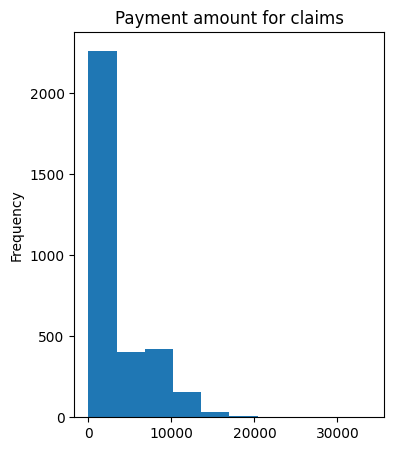

In [27]:
#Check range of payment ampout with histogram
claim['pd_amt'].plot(kind='hist',figsize=(4,5), title='Payment amount for claims')

In [28]:
#Drop 'aft_ind' and 'pd_amt'

to_drop = ['aft_ind' , 'pd_amt']
claim.drop(to_drop, inplace=True, axis=1)
claim.shape

(3279, 3)

In [29]:
#export to csv by giving meaningful name to the dataframe
claim.to_csv('Claim_Data1.csv')

project = Project("State Farm Project","SF")
project.save_data(file_name = "Claim_aft_ind.csv",data = claim.to_csv(index=False))

In [30]:
final_ds1=pd.read_csv('Claim_Data1.csv', index_col='Unnamed: 0')
final_ds1.tail(2)

,hhld_id,fault_claims,not_at_fault_claims
3277,19994,1,0
3278,19997,0,1


In [31]:
final_ds1.shape

(3279, 3)

#### Step 2:

Merge the Datasets 2 and 3, and the aggregated form of Dataset 1 using hhld_id

In [32]:
df_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hhld_id          20000 non-null  int64  
 1   drvr_cnt         20000 non-null  int64  
 2   veh_cnt          20000 non-null  int64  
 3   min_age          20000 non-null  float64
 4   hoh_age          20000 non-null  float64
 5   max_age          20000 non-null  float64
 6   avg_age          20000 non-null  float64
 7   min_mon_lic      20000 non-null  float64
 8   hoh_mon_lic      20000 non-null  float64
 9   max_mon_lic      20000 non-null  float64
 10  avg_mon_lic      20000 non-null  float64
 11  cnt_yth          20000 non-null  int64  
 12  cnt_female       20000 non-null  int64  
 13  cnt_male         20000 non-null  int64  
 14  cnt_married      20000 non-null  int64  
 15  cnt_single       20000 non-null  int64  
 16  hoh_married      20000 non-null  bool   
 17  cnt_auto    

In [33]:
df_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hhld_id         20000 non-null  int64  
 1   premium         20000 non-null  float64
 2   pd_amt          20000 non-null  float64
 3   loss_ratio      20000 non-null  float64
 4   future_clm_ind  20000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 781.4 KB


#### Note: pmt_amt col already available in claim data set . Renameing it to match meta data

In [34]:
df_data_3 = df_data_3.rename(columns={'pd_amt':'loss_amount'})  # as per meta data loss amount for the one year
df_data_3.head(2)

,hhld_id,premium,loss_amount,loss_ratio,future_clm_ind
0,15937,133.6,0.0,0.0,0
1,13778,145.8,0.0,0.0,0


In [35]:
# Merge the Datasets 2 and 3 using hhld_id
df_merge_2and3 = pd.merge(df_data_2,df_data_3,on='hhld_id',how='outer')

In [36]:
df_merge_2and3.shape

(20000, 45)

In [37]:
df_merge_2and3.head(2)

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,...,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,future_clm_ind
0,1,1,1,57.959522,57.959522,57.959522,57.959522,474.900460,446.286652,446.286652,...,1,1,25,25,698.933117,51365,167.00,0.0,0.0,0
1,2,1,1,43.273825,43.273825,43.273825,43.273825,327.285898,327.285898,327.285898,...,1,1,100,100,703.696350,16107,120.24,0.0,0.0,0


## Merge the Datasets 2 and 3, and the aggregated form of Dataset 1 using hhld_id

In [38]:
# df_merge_2and3: DataFrame with shape (20000, 45)
# final_ds1: DataFrame with shape (3279, 3){Aggregated Dataset 1}

combined_df = pd.merge(df_merge_2and3,final_ds1, on = 'hhld_id', how='outer')
combined_df.shape

(20000, 47)

In [39]:
combined_df.head(2)

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,...,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,future_clm_ind,fault_claims,not_at_fault_claims
0,1,1,1,57.959522,57.959522,57.959522,57.959522,474.900460,446.286652,446.286652,...,25,25,698.933117,51365,167.00,0.0,0.0,0,NaN,NaN
1,2,1,1,43.273825,43.273825,43.273825,43.273825,327.285898,327.285898,327.285898,...,100,100,703.696350,16107,120.24,0.0,0.0,0,0.0,1.0


In [40]:
# Replace missing aft indictor values with 0 for hhld_Id that never had a claim as 84% will have NaN . This is boolean indicator. 0: no claim in both cases.
combined_df[['fault_claims' , 'not_at_fault_claims']] = combined_df[['fault_claims' , 'not_at_fault_claims']].fillna(0)
combined_df

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,...,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,future_clm_ind,fault_claims,not_at_fault_claims
0,1,1,1,57.959522,57.959522,57.959522,57.959522,474.900460,446.286652,446.286652,...,25,25,698.933117,51365,167.00,0.000000,0.000000,0,0.0,0.0
1,2,1,1,43.273825,43.273825,43.273825,43.273825,327.285898,327.285898,327.285898,...,100,100,703.696350,16107,120.24,0.000000,0.000000,0,0.0,1.0
2,3,2,1,25.234646,32.296455,32.296455,28.765551,110.815758,195.557459,195.557459,...,25,25,804.472487,68294,120.24,0.000000,0.000000,0,0.0,0.0
3,4,1,1,58.391477,58.391477,58.391477,58.391477,508.697725,508.697725,508.697725,...,25,25,648.400880,45689,167.00,0.000000,0.000000,0,0.0,0.0
4,5,2,1,40.654362,53.830470,53.830470,47.242416,295.852339,453.965637,453.965637,...,25,25,697.084985,36529,150.30,0.000000,0.000000,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,1,45.808587,45.808587,45.808587,45.808587,357.703048,357.703048,357.703048,...,50,50,616.729344,74670,167.00,0.000000,0.000000,0,0.0,0.0
19996,19997,1,2,52.178636,52.178636,52.178636,52.178636,434.143629,434.143629,434.143629,...,250,250,740.122456,96391,251.20,0.000000,0.000000,0,0.0,1.0
19997,19998,2,1,39.206627,47.034727,47.034727,43.120677,278.479529,372.416728,372.416728,...,25,25,780.246976,52074,80.00,0.000000,0.000000,0,0.0,0.0
19998,19999,4,2,16.138190,41.157950,49.490421,33.384649,1.658285,301.895404,401.885048,...,100,100,568.880555,52611,247.00,805.084306,3.259451,1,0.0,0.0


In [41]:
cols=list(combined_df.columns.values) # get the list of cols name to view and rearrage
cols

['hhld_id',
 'drvr_cnt',
 'veh_cnt',
 'min_age',
 'hoh_age',
 'max_age',
 'avg_age',
 'min_mon_lic',
 'hoh_mon_lic',
 'max_mon_lic',
 'avg_mon_lic',
 'cnt_yth',
 'cnt_female',
 'cnt_male',
 'cnt_married',
 'cnt_single',
 'hoh_married',
 'cnt_auto',
 'cnt_mtrcyc',
 'avg_majr_viol',
 'cnt_majr_viol',
 'cnt_minr_viol',
 'avg_minr_viol',
 'cnt_lic_susp',
 'curnt_insurer',
 'time_w_carr',
 'inforce_ind',
 'prior_bi',
 'fire_ind',
 'homeowner_ind',
 'veh_lien_cnt',
 'veh_lease_cnt',
 'veh_own_cnt',
 'monthly_pay_ind',
 'veh_w_coll_cnt',
 'veh_w_comp_cnt',
 'veh_w_ers_cnt',
 'curnt_bi_low',
 'curnt_bi_upp',
 'credit_score',
 'zipcode',
 'premium',
 'loss_amount',
 'loss_ratio',
 'future_clm_ind',
 'fault_claims',
 'not_at_fault_claims']

In [42]:
combined = combined_df.reindex(columns=['hhld_id', 'drvr_cnt', 'veh_cnt', 'min_age', 'hoh_age', 'max_age', 'avg_age', 'min_mon_lic', 'hoh_mon_lic', 'max_mon_lic', 'avg_mon_lic', 'cnt_yth',
 'cnt_female',
 'cnt_male',
 'cnt_married',
 'cnt_single',
 'hoh_married',
 'cnt_auto',
 'cnt_mtrcyc',
 'avg_majr_viol',
 'cnt_majr_viol',
 'cnt_minr_viol',
 'avg_minr_viol',
 'cnt_lic_susp',
 'curnt_insurer',
 'time_w_carr',
 'inforce_ind',
 'prior_bi',
 'fire_ind',
 'homeowner_ind',
 'veh_lien_cnt',
 'veh_lease_cnt',
 'veh_own_cnt',
 'monthly_pay_ind',
 'veh_w_coll_cnt',
 'veh_w_comp_cnt',
 'veh_w_ers_cnt',
 'curnt_bi_low',
 'curnt_bi_upp',
 'credit_score',
 'zipcode',
 'premium',
 'loss_amount',
 'loss_ratio',
 'fault_claims',
 'not_at_fault_claims','future_clm_ind'])

In [43]:
combined

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,...,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,fault_claims,not_at_fault_claims,future_clm_ind
0,1,1,1,57.959522,57.959522,57.959522,57.959522,474.900460,446.286652,446.286652,...,25,25,698.933117,51365,167.00,0.000000,0.000000,0.0,0.0,0
1,2,1,1,43.273825,43.273825,43.273825,43.273825,327.285898,327.285898,327.285898,...,100,100,703.696350,16107,120.24,0.000000,0.000000,0.0,1.0,0
2,3,2,1,25.234646,32.296455,32.296455,28.765551,110.815758,195.557459,195.557459,...,25,25,804.472487,68294,120.24,0.000000,0.000000,0.0,0.0,0
3,4,1,1,58.391477,58.391477,58.391477,58.391477,508.697725,508.697725,508.697725,...,25,25,648.400880,45689,167.00,0.000000,0.000000,0.0,0.0,0
4,5,2,1,40.654362,53.830470,53.830470,47.242416,295.852339,453.965637,453.965637,...,25,25,697.084985,36529,150.30,0.000000,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,1,45.808587,45.808587,45.808587,45.808587,357.703048,357.703048,357.703048,...,50,50,616.729344,74670,167.00,0.000000,0.000000,0.0,0.0,0
19996,19997,1,2,52.178636,52.178636,52.178636,52.178636,434.143629,434.143629,434.143629,...,250,250,740.122456,96391,251.20,0.000000,0.000000,0.0,1.0,0
19997,19998,2,1,39.206627,47.034727,47.034727,43.120677,278.479529,372.416728,372.416728,...,25,25,780.246976,52074,80.00,0.000000,0.000000,0.0,0.0,0
19998,19999,4,2,16.138190,41.157950,49.490421,33.384649,1.658285,301.895404,401.885048,...,100,100,568.880555,52611,247.00,805.084306,3.259451,0.0,0.0,1


In [44]:
df_model=combined.round(3)
df_model.sort_values('hhld_id')

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,...,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,fault_claims,not_at_fault_claims,future_clm_ind
0,1,1,1,57.960,57.960,57.960,57.960,474.900,446.287,446.287,...,25,25,698.933,51365,167.00,0.000,0.000,0.0,0.0,0
1,2,1,1,43.274,43.274,43.274,43.274,327.286,327.286,327.286,...,100,100,703.696,16107,120.24,0.000,0.000,0.0,1.0,0
2,3,2,1,25.235,32.296,32.296,28.766,110.816,195.557,195.557,...,25,25,804.472,68294,120.24,0.000,0.000,0.0,0.0,0
3,4,1,1,58.391,58.391,58.391,58.391,508.698,508.698,508.698,...,25,25,648.401,45689,167.00,0.000,0.000,0.0,0.0,0
4,5,2,1,40.654,53.830,53.830,47.242,295.852,453.966,453.966,...,25,25,697.085,36529,150.30,0.000,0.000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,1,45.809,45.809,45.809,45.809,357.703,357.703,357.703,...,50,50,616.729,74670,167.00,0.000,0.000,0.0,0.0,0
19996,19997,1,2,52.179,52.179,52.179,52.179,434.144,434.144,434.144,...,250,250,740.122,96391,251.20,0.000,0.000,0.0,1.0,0
19997,19998,2,1,39.207,47.035,47.035,43.121,278.480,372.417,372.417,...,25,25,780.247,52074,80.00,0.000,0.000,0.0,0.0,0
19998,19999,4,2,16.138,41.158,49.490,33.385,1.658,301.895,401.885,...,100,100,568.881,52611,247.00,805.084,3.259,0.0,0.0,1


In [45]:
# Export raw dataset that combines all 3 sets into one with 20k observations and 47 features
df_model.to_csv('Comdined dataset SF.csv')

In [46]:
c = pd.read_csv('Comdined dataset SF.csv',index_col='Unnamed: 0')

In [47]:
c.shape

(20000, 47)

In [48]:
c.head(2)

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,...,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,fault_claims,not_at_fault_claims,future_clm_ind
0,1,1,1,57.960,57.960,57.960,57.960,474.900,446.287,446.287,...,25,25,698.933,51365,167.00,0.0,0.0,0.0,0.0,0
1,2,1,1,43.274,43.274,43.274,43.274,327.286,327.286,327.286,...,100,100,703.696,16107,120.24,0.0,0.0,0.0,1.0,0


> <h2> Feature Engineering</h2>

#### Data Cleaning

Step 1: Remove noise variables that has no impact on outcome.

In [49]:
Feature = c
Feature.drop(['hhld_id','zipcode'], axis=1, inplace=True)
Feature.shape

(20000, 45)

#### Quantitative Cleaning- check missing vlaues and either impute or remove

In [50]:
Feature.isnull().sum()

,0
drvr_cnt,0
veh_cnt,0
min_age,0
hoh_age,0
max_age,0
avg_age,0
min_mon_lic,0
hoh_mon_lic,0
max_mon_lic,0
avg_mon_lic,0



> **Missing Values**
---
* time_w_carr |---->    7010 (35.0%) missing values   
* prior_bi  |----->    7010 (35.0%) missing values
* veh_lien_cnt |---->  19974 (99.9%) missing value
* credit_score |----->  921 (4.6%) missing values
---

In [51]:
# Drop veh_lien_cnt  (99.9%) missing values
Feature.drop(['veh_lien_cnt'], axis=1, inplace=True)
Feature.shape

(20000, 44)

In [52]:
# credit_score has <5% missing value.Impute with mean.
# First, obtaining the mean of credit_score
cds_mean=Feature['credit_score'].mean()
round(cds_mean,3)

663.646

In [53]:
# Second, replacing specific missing values with the above obtained Mean
Feature['credit_score'].fillna(cds_mean, inplace=True)
Feature.describe

<ipython-input-53-fe902cb4ddc6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Feature['credit_score'].fillna(cds_mean, inplace=True)


<bound method NDFrame.describe of        drvr_cnt  veh_cnt  min_age  hoh_age  max_age  avg_age  min_mon_lic  \
0             1        1   57.960   57.960   57.960   57.960      474.900   
1             1        1   43.274   43.274   43.274   43.274      327.286   
2             2        1   25.235   32.296   32.296   28.766      110.816   
3             1        1   58.391   58.391   58.391   58.391      508.698   
4             2        1   40.654   53.830   53.830   47.242      295.852   
...         ...      ...      ...      ...      ...      ...          ...   
19995         1        1   45.809   45.809   45.809   45.809      357.703   
19996         1        2   52.179   52.179   52.179   52.179      434.144   
19997         2        1   39.207   47.035   47.035   43.121      278.480   
19998         4        2   16.138   41.158   49.490   33.385        1.658   
19999         2        2   33.653   51.316   51.316   42.485      211.841   

       hoh_mon_lic  max_mon_lic  avg_mon_lic  ...  veh_w_ers_cnt  \
0          446.287      446.287      446.287  ...              1   
1          327.286      327.286      327.286  ...              1   
2          195.557      195.557      153.187  ...              1   
3          508.698      508.698      508.698  ...              1   
4          453.966      453.966      374.909  ...              1   
...            ...          ...          ...  ...            ...   
19995      357.703      357.703      357.703  ...              1   
19996      434.144      434.144      434.144  ...              2   
19997      372.417      372.417      325.448  ...              0   
19998      301.895      401.885      208.616  ...              1   
19999      423.792      423.792      317.817  ...              1   

       curnt_bi_low  curnt_bi_upp  credit_score  premium  loss_amount  \
0                25            25       698.933   167.00        0.000   
1               100           100       703.696   120.24        0.000   
2                25            25       804.472   120.24        0.000   
3                25            25       648.401   167.00        0.000   
4                25            25       697.085   150.30        0.000   
...             ...           ...           ...      ...          ...   
19995            50            50       616.729   167.00        0.000   
19996           250           250       740.122   251.20        0.000   
19997            25            25       780.247    80.00        0.000   
19998           100           100       568.881   247.00      805.084   
19999           100           100       829.854   197.60        0.000   

       loss_ratio  fault_claims  not_at_fault_claims  future_clm_ind  
0           0.000           0.0                  0.0               0  
1           0.000           0.0                  1.0               0  
2           0.000           0.0                  0.0               0  
3           0.000           0.0                  0.0               0  
4           0.000           0.0                  0.0               0  
...           ...           ...                  ...             ...  
19995       0.000           0.0                  0.0               0  
19996       0.000           0.0                  1.0               0  
19997       0.000           0.0                  0.0               0  
19998       3.259           0.0                  0.0               1  
19999       0.000           0.0                  0.0               0  

[20000 rows x 44 columns]>

In [54]:
# time_w_carr - Time with current insurer has 35% missing value. Impute with Median

Feature['time_w_carr'] = Feature['time_w_carr'].fillna(Feature['time_w_carr'].median())

In [55]:
# prior_bi -  Bodily Injury Coverage Individual Limit with current insurer  has 35% missing value. Impute with Median

Feature['prior_bi'] = Feature['prior_bi'].fillna(Feature['prior_bi'].median())

In [56]:
Feature.isna().sum()

,0
drvr_cnt,0
veh_cnt,0
min_age,0
hoh_age,0
max_age,0
avg_age,0
min_mon_lic,0
hoh_mon_lic,0
max_mon_lic,0
avg_mon_lic,0


In [57]:
Feature

,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,...,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,premium,loss_amount,loss_ratio,fault_claims,not_at_fault_claims,future_clm_ind
0,1,1,57.960,57.960,57.960,57.960,474.900,446.287,446.287,446.287,...,1,25,25,698.933,167.00,0.000,0.000,0.0,0.0,0
1,1,1,43.274,43.274,43.274,43.274,327.286,327.286,327.286,327.286,...,1,100,100,703.696,120.24,0.000,0.000,0.0,1.0,0
2,2,1,25.235,32.296,32.296,28.766,110.816,195.557,195.557,153.187,...,1,25,25,804.472,120.24,0.000,0.000,0.0,0.0,0
3,1,1,58.391,58.391,58.391,58.391,508.698,508.698,508.698,508.698,...,1,25,25,648.401,167.00,0.000,0.000,0.0,0.0,0
4,2,1,40.654,53.830,53.830,47.242,295.852,453.966,453.966,374.909,...,1,25,25,697.085,150.30,0.000,0.000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,1,45.809,45.809,45.809,45.809,357.703,357.703,357.703,357.703,...,1,50,50,616.729,167.00,0.000,0.000,0.0,0.0,0
19996,1,2,52.179,52.179,52.179,52.179,434.144,434.144,434.144,434.144,...,2,250,250,740.122,251.20,0.000,0.000,0.0,1.0,0
19997,2,1,39.207,47.035,47.035,43.121,278.480,372.417,372.417,325.448,...,0,25,25,780.247,80.00,0.000,0.000,0.0,0.0,0
19998,4,2,16.138,41.158,49.490,33.385,1.658,301.895,401.885,208.616,...,1,100,100,568.881,247.00,805.084,3.259,0.0,0.0,1


In [58]:
# Export Feature selected data with 20k observations and 44 features
Feature.to_csv('Featureed_DS_SF.csv')

In [59]:
f = pd.read_csv('Featureed_DS_SF.csv',index_col='Unnamed: 0')

In [60]:
f.head(2)

,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,...,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,premium,loss_amount,loss_ratio,fault_claims,not_at_fault_claims,future_clm_ind
0,1,1,57.960,57.960,57.960,57.960,474.900,446.287,446.287,446.287,...,1,25,25,698.933,167.00,0.0,0.0,0.0,0.0,0
1,1,1,43.274,43.274,43.274,43.274,327.286,327.286,327.286,327.286,...,1,100,100,703.696,120.24,0.0,0.0,0.0,1.0,0


In [61]:
col=list(f.columns.values) # get the list of cols name to view and rearrage
col

['drvr_cnt',
 'veh_cnt',
 'min_age',
 'hoh_age',
 'max_age',
 'avg_age',
 'min_mon_lic',
 'hoh_mon_lic',
 'max_mon_lic',
 'avg_mon_lic',
 'cnt_yth',
 'cnt_female',
 'cnt_male',
 'cnt_married',
 'cnt_single',
 'hoh_married',
 'cnt_auto',
 'cnt_mtrcyc',
 'avg_majr_viol',
 'cnt_majr_viol',
 'cnt_minr_viol',
 'avg_minr_viol',
 'cnt_lic_susp',
 'curnt_insurer',
 'time_w_carr',
 'inforce_ind',
 'prior_bi',
 'fire_ind',
 'homeowner_ind',
 'veh_lease_cnt',
 'veh_own_cnt',
 'monthly_pay_ind',
 'veh_w_coll_cnt',
 'veh_w_comp_cnt',
 'veh_w_ers_cnt',
 'curnt_bi_low',
 'curnt_bi_upp',
 'credit_score',
 'premium',
 'loss_amount',
 'loss_ratio',
 'fault_claims',
 'not_at_fault_claims',
 'future_clm_ind']

In [62]:
f[['drvr_cnt',
 'veh_cnt',
 'min_age',
 'hoh_age',
 'max_age',
 'avg_age',
 'min_mon_lic',
 'hoh_mon_lic',
 'max_mon_lic',
 'avg_mon_lic',
 'cnt_yth',
 'cnt_female',
 'cnt_male',
 'cnt_married',
 'cnt_single',
 'hoh_married',
 'cnt_auto',
 'cnt_mtrcyc',
 'avg_majr_viol',
 'cnt_majr_viol',
 'cnt_minr_viol',
 'avg_minr_viol',
 'cnt_lic_susp',
 'time_w_carr',
 'inforce_ind',
 'prior_bi',
 'fire_ind',
 'homeowner_ind',
 'veh_lease_cnt',
 'veh_own_cnt',
 'monthly_pay_ind',
 'veh_w_coll_cnt',
 'veh_w_comp_cnt',
 'veh_w_ers_cnt',
 'curnt_bi_low',
 'curnt_bi_upp',
 'credit_score',
 'premium',
 'loss_amount',
 'loss_ratio',
 'fault_claims',
 'not_at_fault_claims']].head()

,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,...,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,premium,loss_amount,loss_ratio,fault_claims,not_at_fault_claims
0,1,1,57.960,57.960,57.960,57.960,474.900,446.287,446.287,446.287,...,1,1,25,25,698.933,167.00,0.0,0.0,0.0,0.0
1,1,1,43.274,43.274,43.274,43.274,327.286,327.286,327.286,327.286,...,1,1,100,100,703.696,120.24,0.0,0.0,0.0,1.0
2,2,1,25.235,32.296,32.296,28.766,110.816,195.557,195.557,153.187,...,1,1,25,25,804.472,120.24,0.0,0.0,0.0,0.0
3,1,1,58.391,58.391,58.391,58.391,508.698,508.698,508.698,508.698,...,1,1,25,25,648.401,167.00,0.0,0.0,0.0,0.0
4,2,1,40.654,53.830,53.830,47.242,295.852,453.966,453.966,374.909,...,1,1,25,25,697.085,150.30,0.0,0.0,0.0,0.0


In [63]:
Feature_Selected =f[[
 'cnt_majr_viol',
 'cnt_minr_viol',
 'cnt_lic_susp',
 'prior_bi',
 'veh_lease_cnt',
 'veh_own_cnt',
 'veh_w_coll_cnt',
 'veh_w_comp_cnt',
 'veh_w_ers_cnt',
 'curnt_bi_low',
 'curnt_bi_upp',
 'credit_score',
 'premium',
 'loss_amount',
 'loss_ratio',
 'fault_claims',
 'not_at_fault_claims']]

In [64]:
Feature_Selected.head(5)

,cnt_majr_viol,cnt_minr_viol,cnt_lic_susp,prior_bi,veh_lease_cnt,veh_own_cnt,veh_w_coll_cnt,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,premium,loss_amount,loss_ratio,fault_claims,not_at_fault_claims
0,0,0,0,100000.0,0,0,1,1,1,25,25,698.933,167.00,0.0,0.0,0.0,0.0
1,0,0,0,25000.0,0,0,1,1,1,100,100,703.696,120.24,0.0,0.0,0.0,1.0
2,0,0,0,50000.0,0,1,1,1,1,25,25,804.472,120.24,0.0,0.0,0.0,0.0
3,0,0,0,25000.0,0,0,1,1,1,25,25,648.401,167.00,0.0,0.0,0.0,0.0
4,0,0,0,25000.0,0,1,1,1,1,25,25,697.085,150.30,0.0,0.0,0.0,0.0


> **Create a model where you are trying to identify if the applicant had a future loss (future_clm_ind) using the information known on or before the application date.**

**Lets defind feature sets, X:**

In [65]:
X = Feature_Selected
X[0:5]

,cnt_majr_viol,cnt_minr_viol,cnt_lic_susp,prior_bi,veh_lease_cnt,veh_own_cnt,veh_w_coll_cnt,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,premium,loss_amount,loss_ratio,fault_claims,not_at_fault_claims
0,0,0,0,100000.0,0,0,1,1,1,25,25,698.933,167.00,0.0,0.0,0.0,0.0
1,0,0,0,25000.0,0,0,1,1,1,100,100,703.696,120.24,0.0,0.0,0.0,1.0
2,0,0,0,50000.0,0,1,1,1,1,25,25,804.472,120.24,0.0,0.0,0.0,0.0
3,0,0,0,25000.0,0,0,1,1,1,25,25,648.401,167.00,0.0,0.0,0.0,0.0
4,0,0,0,25000.0,0,1,1,1,1,25,25,697.085,150.30,0.0,0.0,0.0,0.0


**Lets defind feature sets, Y:**

In [66]:
y = f['future_clm_ind'].values
y[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Classification

Now, use the training set to build an accurate model. Then use the test set to report the accuracy of the model going to use the following algorithm:

* K Nearest Neighbor(KNN)
* Decision Tree
* Support Vector Machine
* Logistic Regression

Notice:
You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.Using  either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.

## K Nearest Neighbor(KNN)
Find the best k to build the model with the best accuracy.To find the best k, split Featureed_DS_SF.csv into train and test to find the best k.

In [67]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X,y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape,y_test.shape)

Train set: (16000, 17) (16000,)
Test set: (4000, 17) (4000,)


[0.99975 0.99975 0.99975 0.99975 0.99975 0.99975 0.99975 0.99975 0.99975]


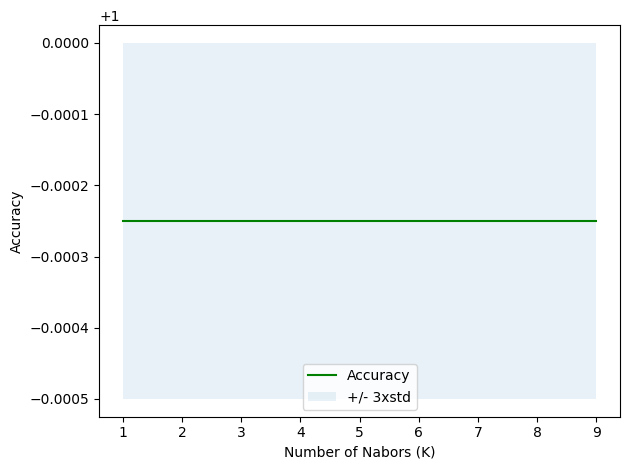

The best Acuuracy was with 0.99975 with k= 1


In [68]:
#import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#accuracy
print(mean_acc)

#plot model accuracy for Differnt number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc -1 * std_acc,mean_acc + 1 * std_acc,alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

#result
print("The best Acuuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
Future_Claim = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Future_Claim

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [71]:
#Training
Future_Claim.fit(X_train,y_train)
Future_Claim

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Support Vector machine

In [72]:
#import library
from sklearn import svm

In [73]:
#training
clf = svm.SVC()

In [74]:
clf.fit(X_train, y_train)

SVC()


## Logistic Regression

In [75]:
#import library
from sklearn.linear_model import LogisticRegression

In [76]:
#training
LR = LogisticRegression(C=0.01).fit(X_train,y_train)

In [77]:
LR

LogisticRegression(C=0.01)

## Model Evaluating using Test set

In [78]:
#import lib
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

Going to Load Test set for Evaluation "Featureed_DS_SF.csv"

In [79]:
test_df = pd.read_csv('Featureed_DS_SF.csv',index_col='Unnamed: 0' )
test_df.head()

,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,...,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,premium,loss_amount,loss_ratio,fault_claims,not_at_fault_claims,future_clm_ind
0,1,1,57.960,57.960,57.960,57.960,474.900,446.287,446.287,446.287,...,1,25,25,698.933,167.00,0.0,0.0,0.0,0.0,0
1,1,1,43.274,43.274,43.274,43.274,327.286,327.286,327.286,327.286,...,1,100,100,703.696,120.24,0.0,0.0,0.0,1.0,0
2,2,1,25.235,32.296,32.296,28.766,110.816,195.557,195.557,153.187,...,1,25,25,804.472,120.24,0.0,0.0,0.0,0.0,0
3,1,1,58.391,58.391,58.391,58.391,508.698,508.698,508.698,508.698,...,1,25,25,648.401,167.00,0.0,0.0,0.0,0.0,0
4,2,1,40.654,53.830,53.830,47.242,295.852,453.966,453.966,374.909,...,1,25,25,697.085,150.30,0.0,0.0,0.0,0.0,0


In [80]:
test_df.shape

(20000, 44)

In [81]:
#Pre-processing

Feature_test = test_df[['cnt_majr_viol',
 'cnt_minr_viol',
 'cnt_lic_susp',
 'prior_bi',
 'veh_lease_cnt',
 'veh_own_cnt',
 'veh_w_coll_cnt',
 'veh_w_comp_cnt',
 'veh_w_ers_cnt',
 'curnt_bi_low',
 'curnt_bi_upp',
 'credit_score',
 'premium',
 'loss_amount',
 'loss_ratio',
 'fault_claims',
 'not_at_fault_claims']]

In [82]:
test_X = Feature_test

test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

array([[-0.10569424, -0.44356387, -0.10431655,  0.43086418, -0.19997503,
        -0.72698865,  0.19688043,  0.19567519,  0.32108777, -0.66618076,
        -0.66618076,  0.35633134, -0.01020301, -0.19973295, -0.18889542,
        -0.23432803, -0.35184367],
       [-0.10569424, -0.44356387, -0.10431655, -0.78781543, -0.19997503,
        -0.72698865,  0.19688043,  0.19567519,  0.32108777,  0.59704045,
         0.59704045,  0.40442842, -0.65123199, -0.19973295, -0.18889542,
        -0.23432803,  2.44611793],
       [-0.10569424, -0.44356387, -0.10431655, -0.3815889 , -0.19997503,
         0.89702263,  0.19688043,  0.19567519,  0.32108777, -0.66618076,
        -0.66618076,  1.42207102, -0.65123199, -0.19973295, -0.18889542,
        -0.23432803, -0.35184367],
       [-0.10569424, -0.44356387, -0.10431655, -0.78781543, -0.19997503,
        -0.72698865,  0.19688043,  0.19567519,  0.32108777, -0.66618076,
        -0.66618076, -0.15394408, -0.01020301, -0.19973295, -0.18889542,
        -0.23432803

In [83]:
#Pre-processing loan_test
test_y = test_df['future_clm_ind'].values
test_y[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0])

In [84]:
#predicted y
yhat_knn = neigh.predict(test_X)

#jaccard
jaccard_knn = jaccard_score(test_y,yhat_knn,pos_label = 1)
print("KNN Jaccard index:", jaccard_knn)

#f1_score
f1_score_knn = f1_score(test_y,yhat_knn, average='weighted')
print("KNN F1-score:", f1_score_knn)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN Jaccard index: 0.0
KNN F1-score: 0.9353074570033989


In [85]:

#Decision Tree
#Predicted y
yhat_dt = Future_Claim.predict(test_X)

#jaccard
jaccard_dt = jaccard_score(test_y,yhat_dt, pos_label = 1)
print("DT JAccard index:", jaccard_dt)

#f1_score
f1_score_dt = f1_score(test_y,yhat_dt, average='weighted')
print("DT F1-score:", f1_score_dt)

DT JAccard index: 0.998849252013809
DT F1-score: 0.9999499862607417


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [86]:
#Support Vector machine
#predicted y
yhat_svm = clf.predict(test_X)

#jaccard
jaccard_svm = jaccard_score(test_y, yhat_svm,pos_label = 1)
print("SVM Jaccard index:", jaccard_svm)

#f1-score
f1_score_svm = f1_score(test_y, yhat_svm, average='weighted')
print("SVM F1-score:", f1_score_svm)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


SVM Jaccard index: 0.0
SVM F1-score: 0.9353074570033989


In [87]:
#Logistic Regression'
#predicted y
yhat_lg = LR.predict(test_X)
yhat_lg_prob = LR.predict_proba(test_X)

#jaccard
jaccard_lg = jaccard_score(test_y, yhat_lg, pos_label = 1)
print("LR jaccard index:", jaccard_lg)

#f1-score
f1_score_lg = f1_score(test_y, yhat_lg, average='weighted')
print("LR F1-score:", f1_score_lg)

#logloss
logloss_lg = log_loss(test_y, yhat_lg_prob)
print("LR log loss:", logloss_lg)

LR jaccard index: 0.2045187102847729
LR F1-score: 0.8786171113512854
LR log loss: 0.67731335986941


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [88]:
js_list = (jaccard_knn,jaccard_dt,jaccard_svm,jaccard_lg)
f1_list = (f1_score_knn,f1_score_dt,f1_score_svm,f1_score_lg)
l1_list = ('NA','NA','NA',logloss_lg)

In [89]:

columns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'Logloss']

In [90]:
accuracy_df =pd.DataFrame([js_list,f1_list,l1_list], index = index, columns = columns)


> # Report 1

In [91]:
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,Logloss
KNN,0.0,0.935307,NA
Decision Tree,0.998849,0.99995,NA
SVM,0.0,0.935307,NA
Logistic Regression,0.204519,0.878617,0.677313


In [92]:
Feature_test2=test_df[['fault_claims', 'not_at_fault_claims']]
test_X1 = Feature_test

test_X1 = preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X1[0:5]

array([[-0.10569424, -0.44356387, -0.10431655,  0.43086418, -0.19997503,
        -0.72698865,  0.19688043,  0.19567519,  0.32108777, -0.66618076,
        -0.66618076,  0.35633134, -0.01020301, -0.19973295, -0.18889542,
        -0.23432803, -0.35184367],
       [-0.10569424, -0.44356387, -0.10431655, -0.78781543, -0.19997503,
        -0.72698865,  0.19688043,  0.19567519,  0.32108777,  0.59704045,
         0.59704045,  0.40442842, -0.65123199, -0.19973295, -0.18889542,
        -0.23432803,  2.44611793],
       [-0.10569424, -0.44356387, -0.10431655, -0.3815889 , -0.19997503,
         0.89702263,  0.19688043,  0.19567519,  0.32108777, -0.66618076,
        -0.66618076,  1.42207102, -0.65123199, -0.19973295, -0.18889542,
        -0.23432803, -0.35184367],
       [-0.10569424, -0.44356387, -0.10431655, -0.78781543, -0.19997503,
        -0.72698865,  0.19688043,  0.19567519,  0.32108777, -0.66618076,
        -0.66618076, -0.15394408, -0.01020301, -0.19973295, -0.18889542,
        -0.23432803

In [93]:
#Pre-processing Future Claim
test_y = test_df['future_clm_ind'].values
test_y[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0])

In [94]:
#predicted y
yhat_knn = neigh.predict(test_X1)

#jaccard
jaccard_knn = jaccard_score(test_y,yhat_knn,pos_label = 1)
print("KNN Jaccard index:", jaccard_knn)

#f1_score
f1_score_knn = f1_score(test_y,yhat_knn, average='weighted')
print("KNN F1-score:", f1_score_knn)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN Jaccard index: 0.0
KNN F1-score: 0.9353074570033989


In [95]:
#Decision Tree
#Predicted y
yhat_dt = Future_Claim.predict(test_X1)

#jaccard
jaccard_dt = jaccard_score(test_y,yhat_dt, pos_label = 1)
print("DT JAccard index:", jaccard_dt)

#f1_score
f1_score_dt = f1_score(test_y,yhat_dt, average='weighted')
print("DT F1-score:", f1_score_dt)

DT JAccard index: 0.998849252013809
DT F1-score: 0.9999499862607417


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [96]:

#Support Vector machine
#predicted y
yhat_svm = clf.predict(test_X1)

#jaccard
jaccard_svm = jaccard_score(test_y, yhat_svm,pos_label = 1)
print("SVM Jaccard index:", jaccard_svm)

#f1-score
f1_score_svm = f1_score(test_y, yhat_svm, average='weighted')
print("SVM F1-score:", f1_score_svm)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


SVM Jaccard index: 0.0
SVM F1-score: 0.9353074570033989


In [97]:
#Logistic Regression'
#predicted y
yhat_lg = LR.predict(test_X1)
yhat_lg_prob = LR.predict_proba(test_X)

#jaccard
jaccard_lg = jaccard_score(test_y, yhat_lg, pos_label = 1)
print("LR jaccard index:", jaccard_lg)

#f1-score
f1_score_lg = f1_score(test_y, yhat_lg, average='weighted')
print("LR F1-score:", f1_score_lg)

#logloss
logloss_lg = log_loss(test_y, yhat_lg_prob)
print("LR log loss:", logloss_lg)

LR jaccard index: 0.2045187102847729
LR F1-score: 0.8786171113512854
LR log loss: 0.67731335986941


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [98]:
js_list = (jaccard_knn,jaccard_dt,jaccard_svm,jaccard_lg)
f1_list = (f1_score_knn,f1_score_dt,f1_score_svm,f1_score_lg)
l1_list = ('NA','NA','NA',logloss_lg)

In [99]:
columns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'Logloss']

In [ ]:
accuracy_df2 =pd.DataFrame([js_list,f1_list,l1_list], index = index, columns = columns)

## Report 2


In [100]:

accuracy_df3 = accuracy_df.transpose()
accuracy_df3.columns.name = 'Algorithm'
accuracy_df3

Algorithm,Jaccard,F1-score,Logloss
KNN,0.0,0.935307,NA
Decision Tree,0.998849,0.99995,NA
SVM,0.0,0.935307,NA
Logistic Regression,0.204519,0.878617,0.677313


In [105]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ... (rest of your existing code) ...

# Save the model to a pickle file in the mounted drive
with open('/content/drive/My Drive/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(Future_Claim, file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# prompt: create pickle file from about  Decision Tree model

import pickle

# Assuming 'Future_Claim' is your trained Decision Tree model
# from your provided code snippet

# ... your existing code ...


# Save the model to a pickle file
with open('/content/drive/My Drive/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(Future_Claim, file)

#To load the model
# with open('/content/drive/My Drive/decision_tree_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

# # Now you can use the loaded_model to make predictions
# # ... your code to use loaded_mode